In [118]:
import h5py
import numpy as np
import glob 
import os
import matplotlib.pyplot as plt
data = []
def get_info(dataset,chart_title, max_v=40):
    print(f'min = {dataset.min()} max = {dataset.max()} mean = {dataset.mean()}')
    plt.imshow(dataset.T, aspect='auto', cmap='nipy_spectral',vmin = 0, vmax= max_v)
    plt.title(chart_title)
    data.append({'Denoise Model': chart_title,'Minimum': dataset.min(), 'Maximum': dataset.max(),'Mean': dataset.mean()})

# Python Files Used
- pnp_psnr =  run_pnp_psnr.py
- pnp_ssim = test_ssimpnp.py
- wave_psnr = waveDN.py
- tvb_psnr = tvbDN.py
- tvc_psnr = tvcDN.py
- gauss_psnr = gauss_psnr.py 

min = -854.2912205567452 max = 5615.089935760171 mean = -8.283710927010696e-17


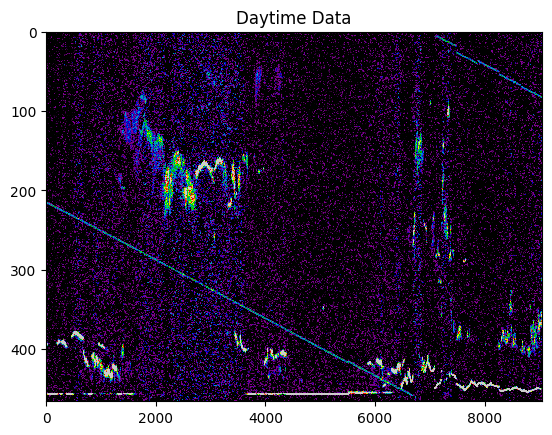

In [119]:
def getBins(file):
    with h5py.File(file, 'r') as data:
        atm = {k: np.array(data[f'/atlas/pce1/atmosphere_s/{k}']) for k in data['/atlas/pce1/atmosphere_s'].keys()}
        atm_bins = atm['atm_bins']
        n_records = atm_bins.shape[0]
        bg = atm_bins.mean(axis=1, keepdims=True)
        atm_bins_mybackg = atm_bins-bg
        return atm_bins_mybackg
    
datadir = '/nfsscratch/Users/wndrsn/atl02'  # Replace with the actual save directory path
files = sorted(glob.glob(os.path.join(datadir, f'**/*.h5'), recursive=True))[90]
dataset = getBins(files)  
get_info(dataset,'Daytime Data')

min = -862.3213948469389 max = 5607.059761469977 mean = -8.03017429019377


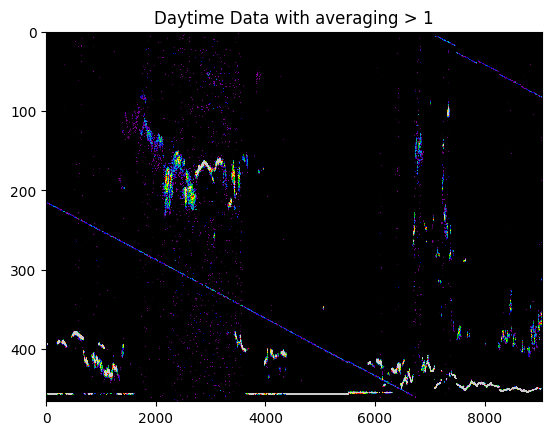

In [120]:
dataset1_filter = dataset < 1 
dataset = dataset + dataset[dataset1_filter].mean()/2
get_info(dataset,'Daytime Data with averaging > 1') 

min = -0.0005130246630885033 max = 0.001891756786047247 mean = -2.790268243209941e-21


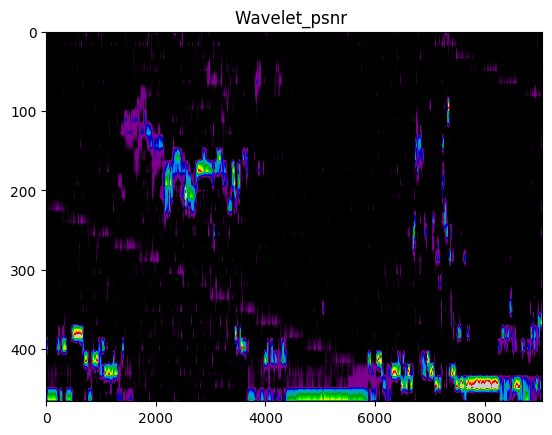

In [121]:
dataset = np.load('/Users/wndrsn/Denoised_Images/waveDenoise0.00100007.npy')
dataset = dataset - dataset.mean(axis=1, keepdims=True) 
# dataset1_filter = dataset < 1 
# dataset = dataset + dataset[dataset1_filter].mean()/2
get_info(dataset,'Wavelet_psnr ',.00100007)

min = -168.9242968624601 max = 3436.946930370747 mean = -4.4353293593120917e-16


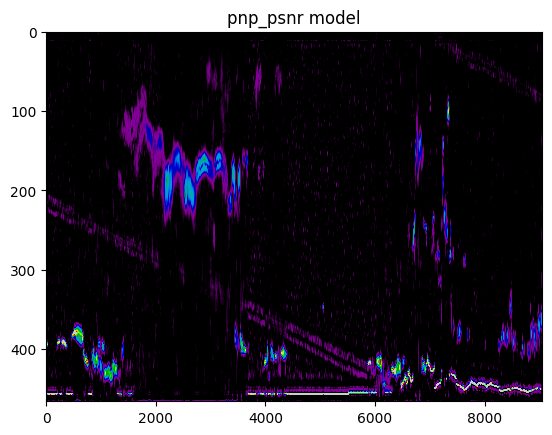

In [122]:
import numpy as np
import matplotlib.pyplot as plt
dataset = np.load('/Users/wndrsn/Denoised_Images/pnp_psnr6.99999843.npy')
get_info(dataset,'pnp_psnr model',80)

min = -170.26966789653125 max = 3435.601559336676 mean = -1.3453710340711378


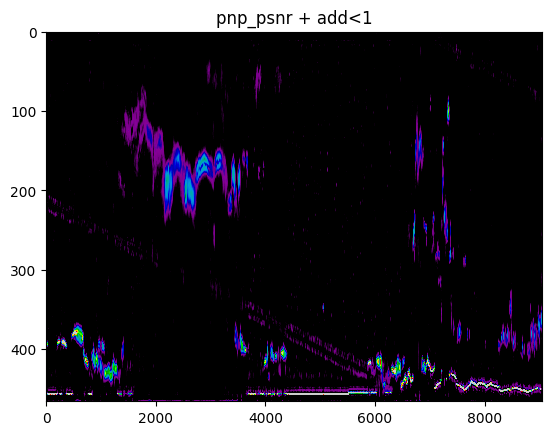

In [123]:
import numpy as np
# dataset = dataset- dataset.mean(axis=1, keepdims=True)
dataset1_filter = dataset < 1 
dataset = dataset + dataset[dataset1_filter].mean()/2
get_info(dataset,'pnp_psnr + add<1',80)

min = -0.012300579021601234 max = 0.02367861094516667 mean = 1.0952151740742991e-20


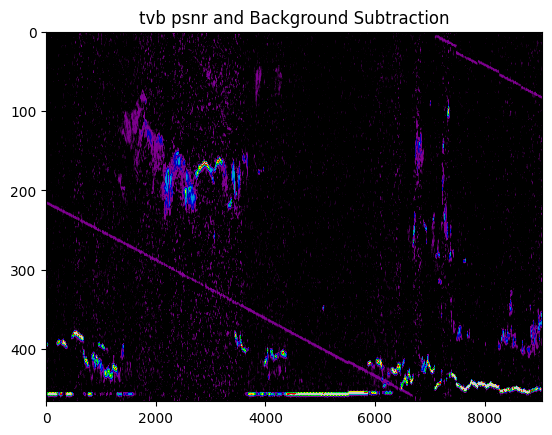

In [124]:
import numpy as np
import matplotlib.pyplot as plt
dataset = np.load('/Users/wndrsn/Denoised_Images/tvb0.001.npy')
dataset = dataset - dataset.mean(axis=1, keepdims=True)

get_info(dataset,'tvb psnr and Background Subtraction',.002)

min = -0.009248067411603889 max = 0.08279831787078755 mean = -4.854442852669016e-21


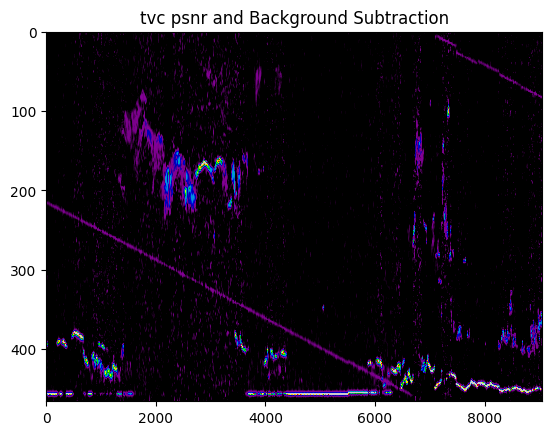

In [125]:
import numpy as np
import matplotlib.pyplot as plt
dataset = np.load('/Users/wndrsn/Denoised_Images/tvc0.00100004.npy')
dataset = dataset - dataset.mean(axis=1, keepdims=True)
get_info(dataset,'tvc psnr and Background Subtraction',.002)

min = -99.19847543726405 max = 127.0232549562157 mean = 2.577244175732732e-16


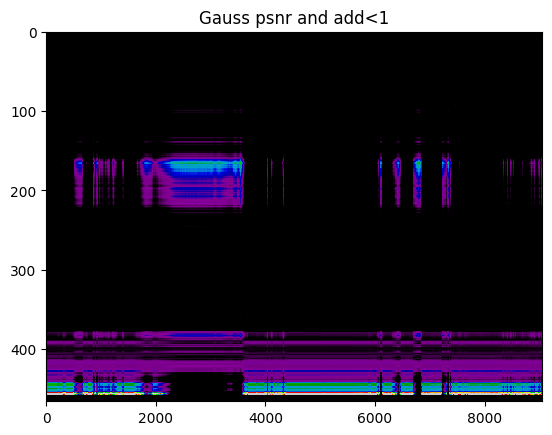

In [126]:
import numpy as np
import matplotlib.pyplot as plt
dataset = np.load('/Users/wndrsn/Denoised_Images/gauss0.19999989.npy')
dataset = dataset - dataset.mean(axis=1, keepdims=True)
# dataset1_filter = dataset < 1 
# dataset = dataset + dataset[dataset1_filter].mean()/2
get_info(dataset,'Gauss psnr and add<1')

In [127]:
import pandas as pd
display(pd.DataFrame(data))

,Denoise Model,Minimum,Maximum,Mean
0,Daytime Data,-854.291221,5615.089936,-8.283711e-17
1,Daytime Data with averaging > 1,-862.321395,5607.059761,-8.030174e+00
2,Wavelet_psnr,-0.000513,0.001892,-2.790268e-21
3,pnp_psnr model,-168.924297,3436.946930,-4.435329e-16
4,pnp_psnr + add<1,-170.269668,3435.601559,-1.345371e+00
5,tvb psnr and Background Subtraction,-0.012301,0.023679,1.095215e-20
6,tvc psnr and Background Subtraction,-0.009248,0.082798,-4.854443e-21
7,Gauss psnr and add<1,-99.198475,127.023255,2.577244e-16
